In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
import glob

In [2]:
damage= glob.glob('train_another/damage/*.jpeg')
no_damage = glob.glob('train_another/no_damage/*.jpeg')

In [3]:
damage_test= glob.glob('test another/damage/*.jpeg')
no_damage_test = glob.glob('test another/no_damage/*.jpeg')

In [5]:
image = []
label = []

for i in damage:
    img=plt.imread(i)
    image.append(img)
    label.append(0)

    
for i in no_damage:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

In [6]:
image_test=[]
label_test=[]

for i in damage_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(0)
    
for i in no_damage_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [7]:
image, label = shuffle(image,label, random_state = 100)

In [8]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

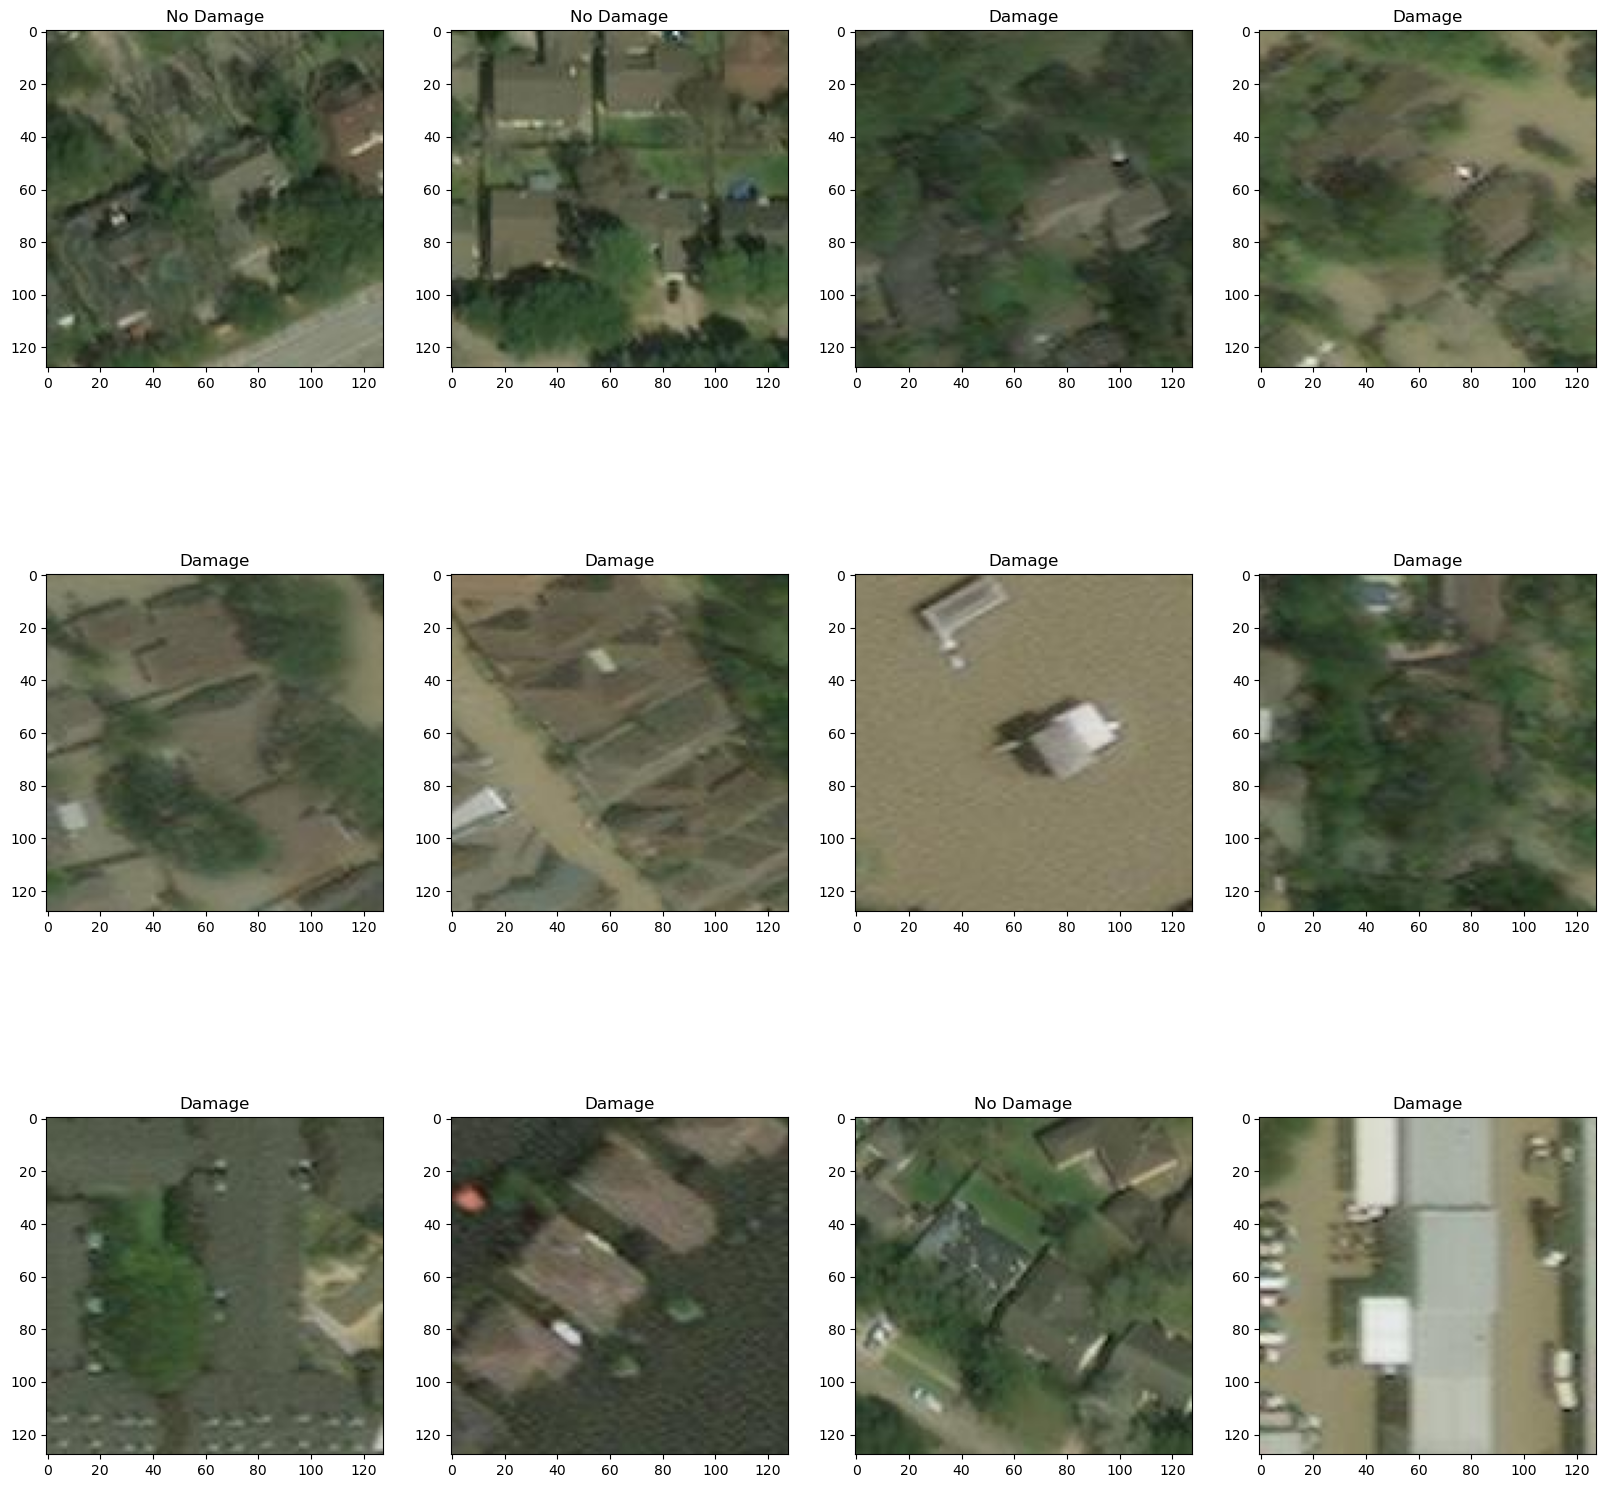

In [10]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

In [11]:
X_train = []

for i in image:
    X_train.append(resize(i,(64,64,3)))
    
X_train = np.array(X_train)

In [12]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(64,64,3)))
    
X_test = np.array(X_test)

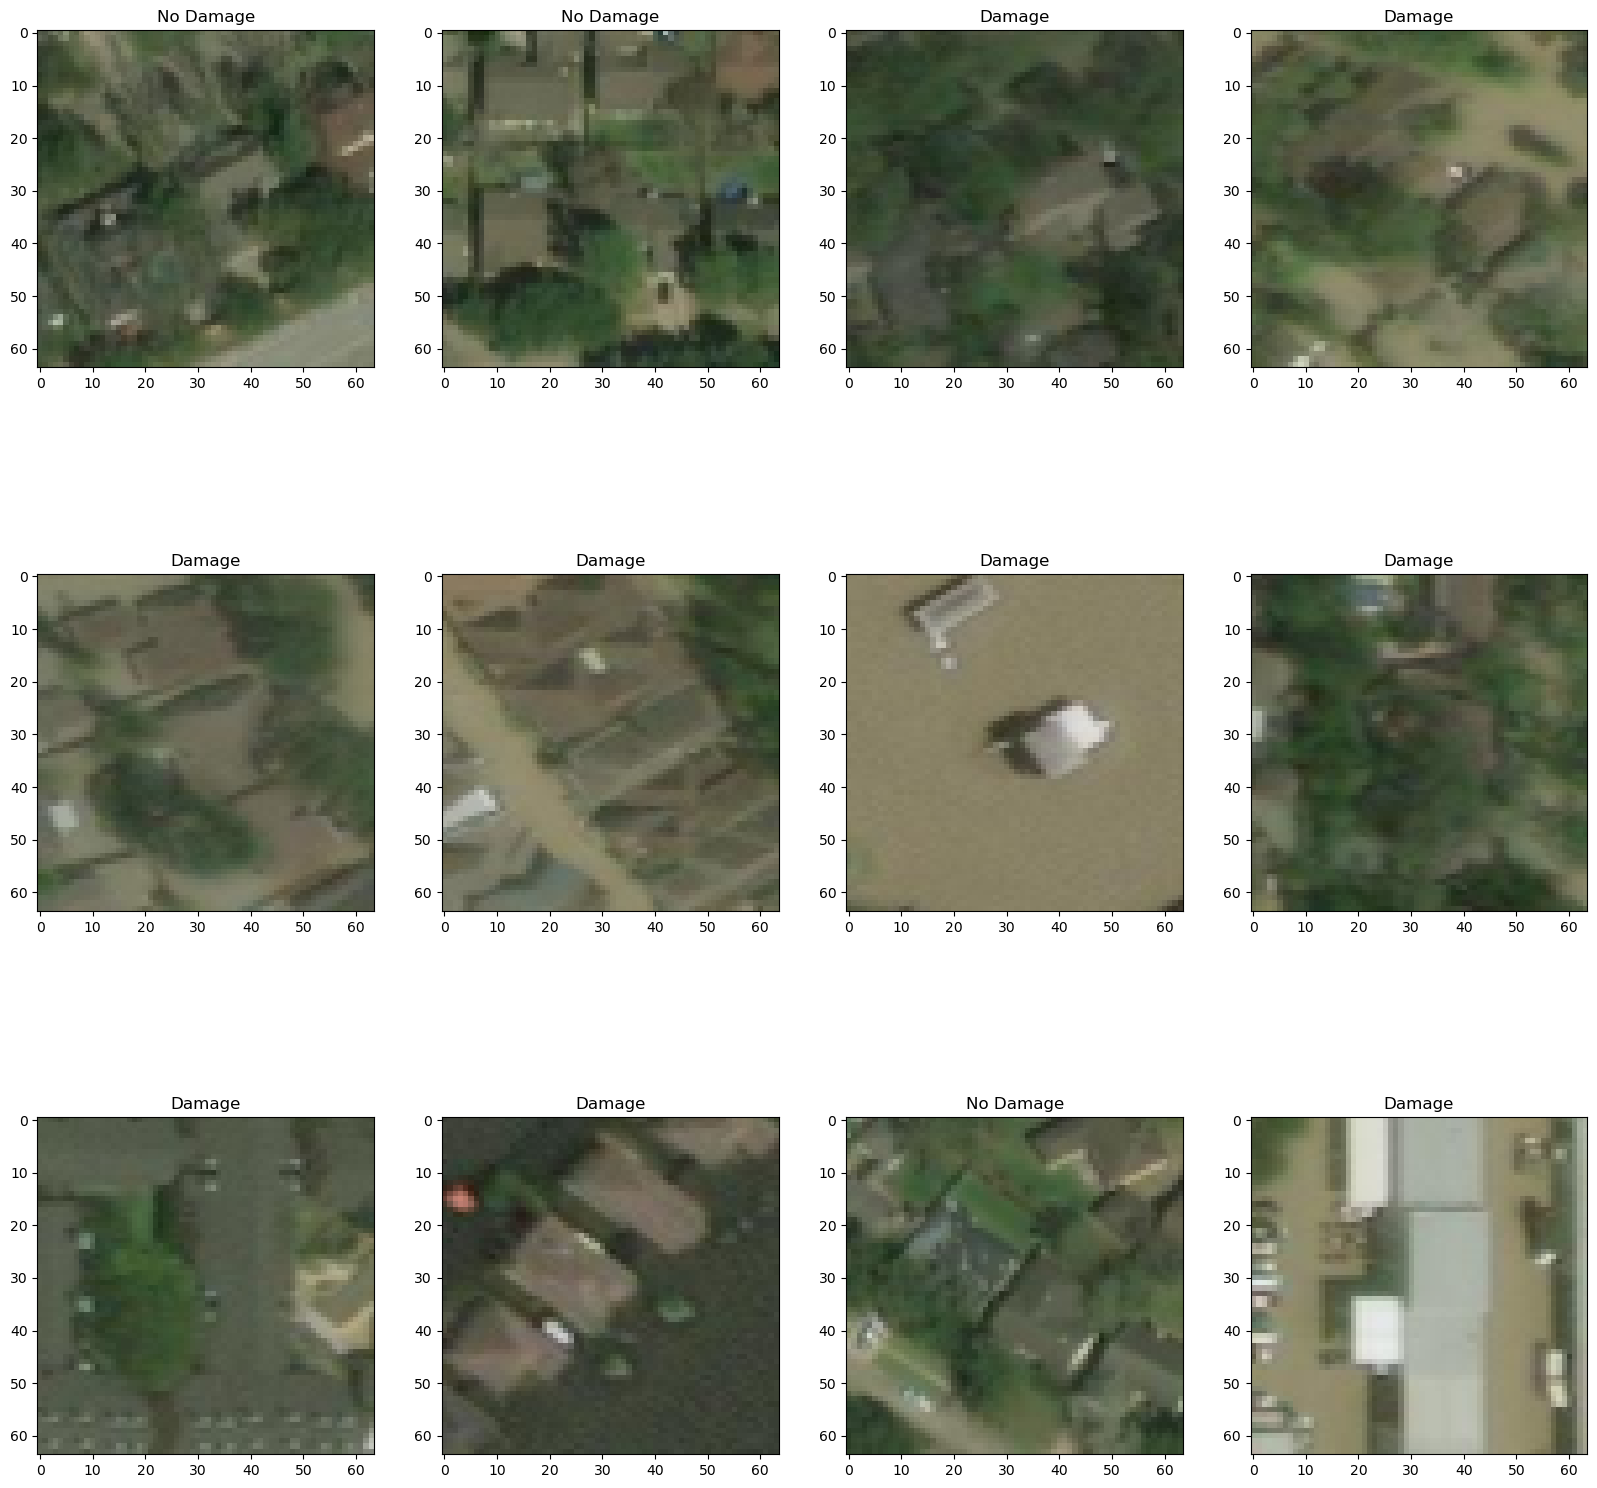

In [13]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if label[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

In [14]:
X_test.shape

(9000, 64, 64, 3)

In [15]:
X_train.shape

(10000, 64, 64, 3)

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

C:\Users\smart\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,690 (1.55 MB)

 Trainable params: 406,690 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
y_train = np.array(label)
y_test = np.array(label_test)

In [21]:
model.fit(X_train,y_train, epochs=10, validation_split=0.1)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6643 - loss: 0.5922 - val_accuracy: 0.8730 - val_loss: 0.3282
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8642 - loss: 0.3374 - val_accuracy: 0.8920 - val_loss: 0.2579
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8914 - loss: 0.2498 - val_accuracy: 0.9110 - val_loss: 0.2065
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9137 - loss: 0.2080 - val_accuracy: 0.9240 - val_loss: 0.1701
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9300 - loss: 0.1704 - val_accuracy: 0.9310 - val_loss: 0.1598
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9418 - loss: 0.1543 - val_accuracy: 0.9380 - val_loss: 0.1448
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9465 - loss: 0.1373 - val_accuracy: 0.9390 - val_loss: 0.1556
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9536 - loss: 0.1202 - val_accu

In [23]:
model.evaluate(X_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9674 - loss: 0.0861


[0.09101473540067673, 0.9641000032424927]

In [24]:
prediction = model.predict(X_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [26]:
pred=[np.argmax(i) for i in prediction]

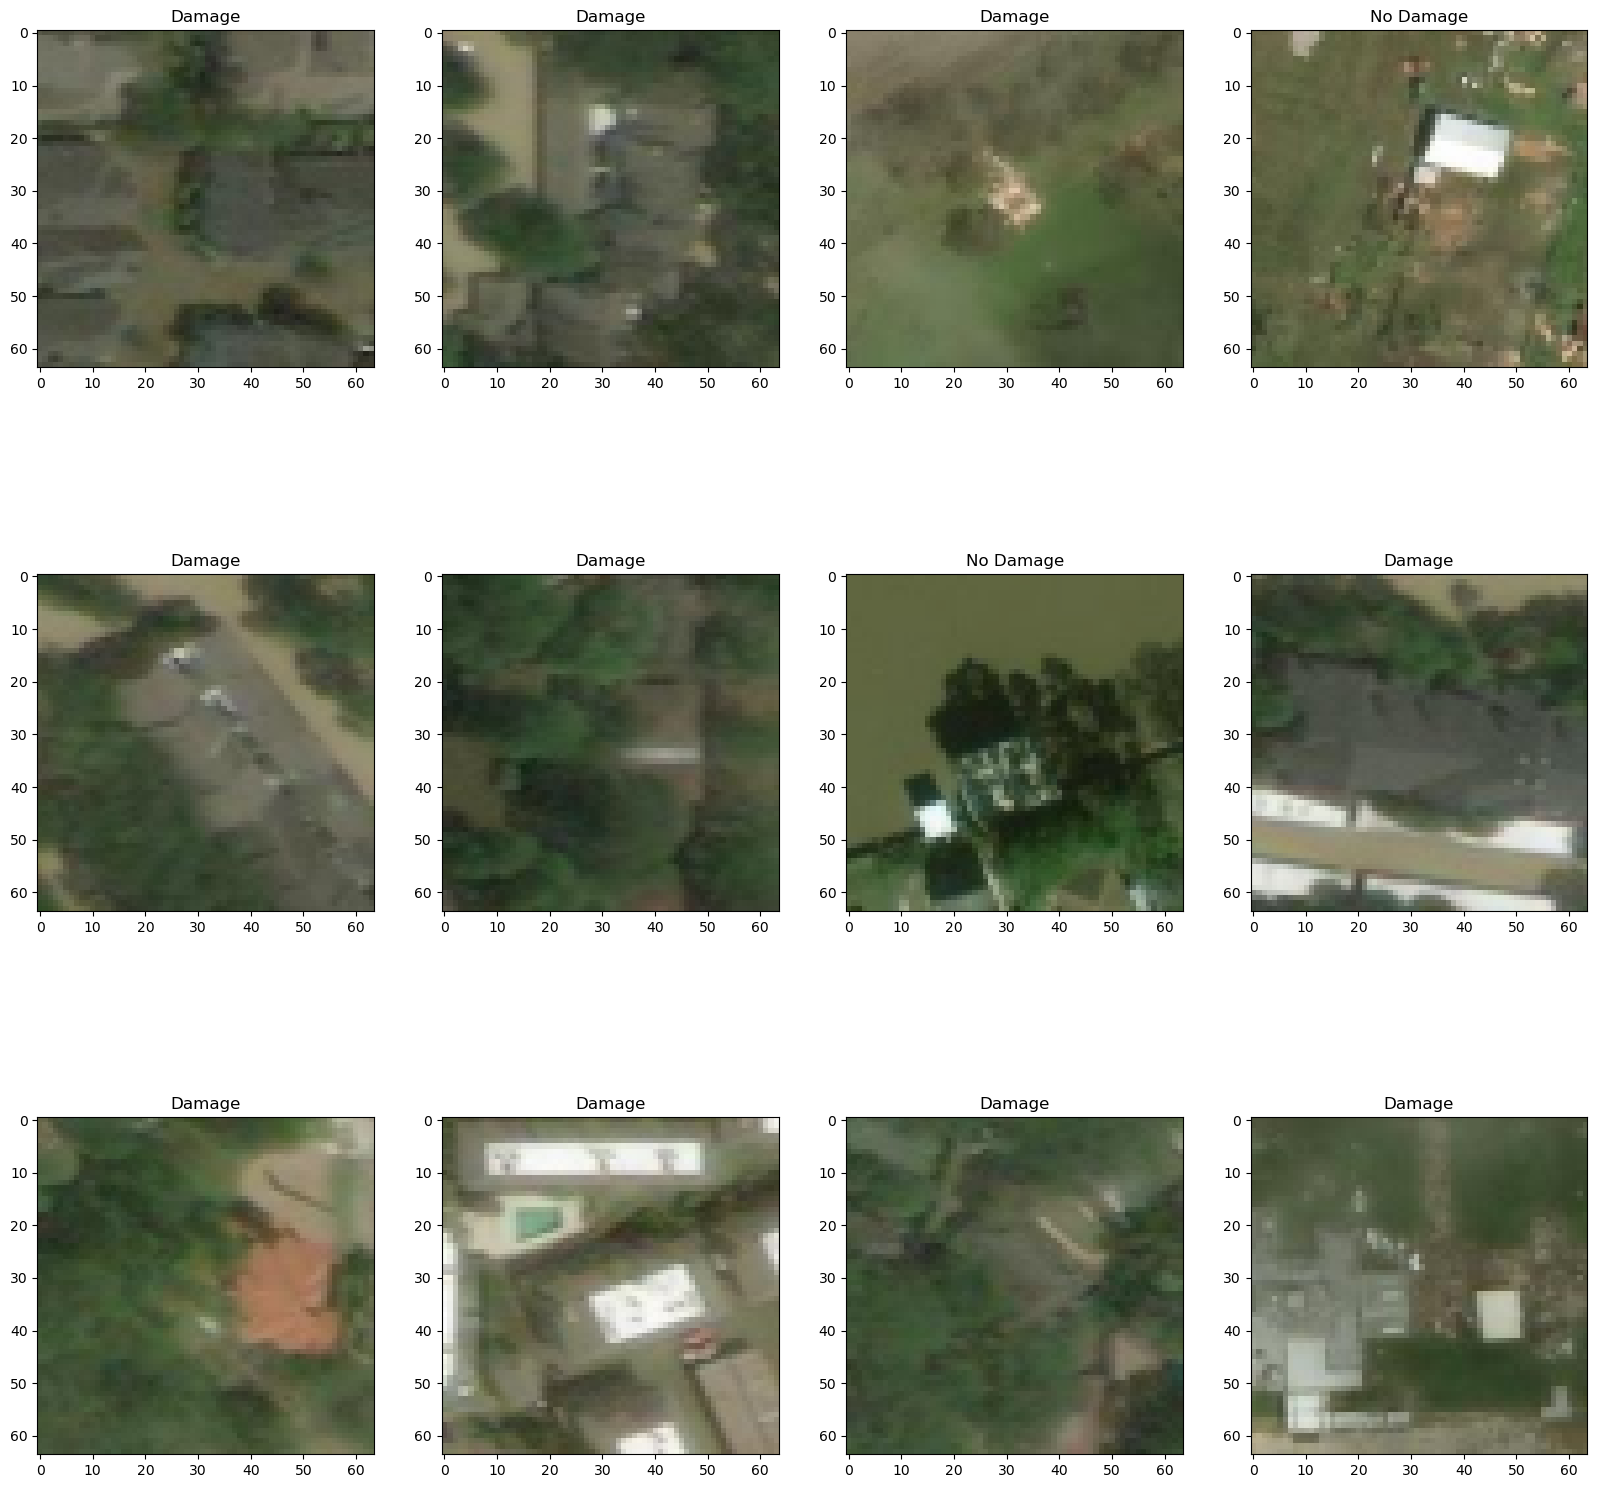

In [27]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
accuracy_score(y_test,pred)

0.9474444444444444

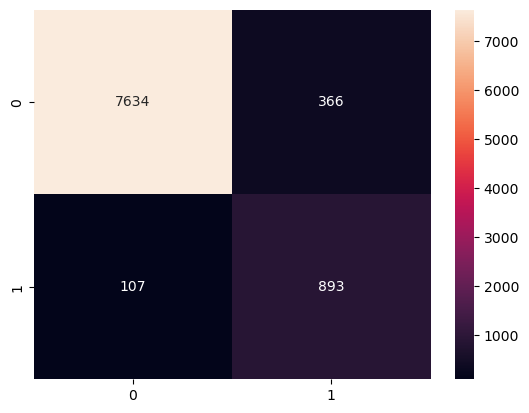

In [30]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True,fmt='d')
plt.show()